In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [240]:
data =pd.read_csv('./dataset and all/test_set_features.csv')

In [241]:
data2 =pd.read_csv('./dataset and all/training_set_features.csv')

In [242]:
data3 =pd.read_csv('./dataset and all/training_set_labels.csv')

In [296]:
import pandas as pd

dataf =pd.concat([data2 ,data3] ,axis =1)



In [311]:

dd =dataf.drop(columns=['employment_industry' ,'employment_occupation' ,'health_insurance' ,'income_poverty'])
dd.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
marital_status           

In [315]:
float_columns = dd.columns[dd.dtypes == 'float64']
dd[float_columns] = dd[float_columns].apply(lambda x: x.fillna(x.median()))


In [316]:
ddn = pd.get_dummies(dd, columns=["employment_status"  ,"age_group" ,"education" ,"race" ,"sex" ,"marital_status" ,"rent_or_own" ,"hhs_geo_region" ,"census_msa"])

In [317]:
ddn

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id,xyz_vaccine,seasonal_vaccine,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,employment_status_Unknown,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,education_Unknown,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,marital_status_Married,marital_status_Not Married,marital_status_Unknown,rent_or_own_Own,rent_or_own_Rent,rent_or_own_Unknown,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0,0,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1,0,1,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,2,0,0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,3,0,1,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,4,0,0,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,26702,0,0,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,26703,0,0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0

In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


In [331]:
X_train, X_test, y_train, y_test = train_test_split(ddnnn.drop(columns=['xyz_vaccine' ,'seasonal_vaccine']), ddnnn['seasonal_vaccine'], test_size=0.2, random_state=42)


In [332]:
modela = LogisticRegression(max_iter=1000,random_state=42, penalty='l2', solver='liblinear', C=1.0)

[[0.80216531 0.19783469]
 [0.83647784 0.16352216]
 [0.18651655 0.81348345]
 ...
 [0.46068119 0.53931881]
 [0.42770679 0.57229321]
 [0.32717111 0.67282889]]
AUC - Test Set: 85.04%


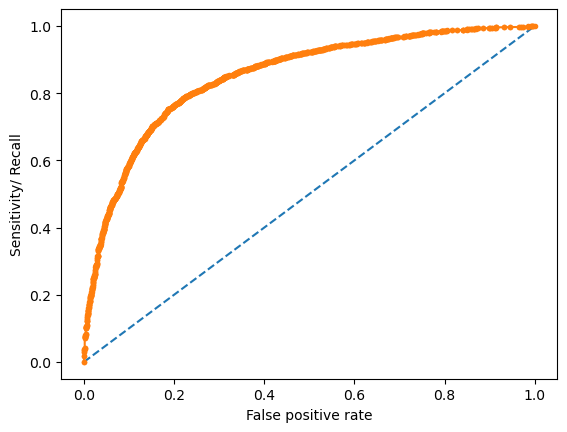

In [333]:
#Classification Area under curve

seed = 7
#split data


modela.fit(X_train, y_train)

# predict probabilities
probs = modela.predict_proba(X_test)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [330]:
corr_matrix = ddn.corr()

# Extract the correlation values for the 'xyz_vaccine' column
xyz_vaccine_corr = corr_matrix['seasonal_vaccine']

# Select columns where the correlation with 'xyz_vaccine' is greater than 0.05 or less than -0.05
significant_corr = xyz_vaccine_corr[(xyz_vaccine_corr > 0.05) | (xyz_vaccine_corr < -0.05)]

# Filter the original DataFrame to include only these columns
ddnnn = ddn[significant_corr.index]

In [231]:
pd.set_option('display.max_columns', None)

In [232]:
model = LogisticRegression(max_iter=1000,random_state=42,penalty='l1', solver='liblinear', C=1.0)
X_train, X_test, y_train, y_test = train_test_split(ddnnn.drop(columns=['xyz_vaccine' ,'seasonal_vaccine']), ddnnn['seasonal_vaccine'], test_size=0.8, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

[[0.87834356 0.12165644]
 [0.92041027 0.07958973]
 [0.23537944 0.76462056]
 ...
 [0.32912691 0.67087309]
 [0.10981281 0.89018719]
 [0.55420371 0.44579629]]


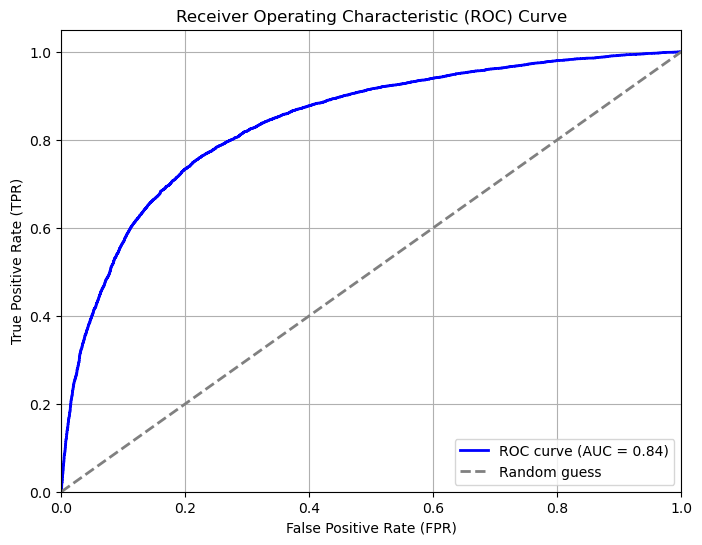

In [233]:
probs = model.predict_proba(X_test)
print(probs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]


from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Sample data (you can replace this with your own data)


# Load the data into a DataFrame
df = ddnnn

# Split the data into features and target
X = ddnnn.drop(columns=['xyz_vaccine' ,'seasonal_vaccine'])
y = ddnnn['seasonal_vaccine']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7754898290278298
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      4342
           1       0.77      0.72      0.75      3671

    accuracy                           0.78      8013
   macro avg       0.78      0.77      0.77      8013
weighted avg       0.78      0.78      0.77      8013



In [284]:
data

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
